In [12]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [13]:
df = pd.DataFrame()

In [14]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [15]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

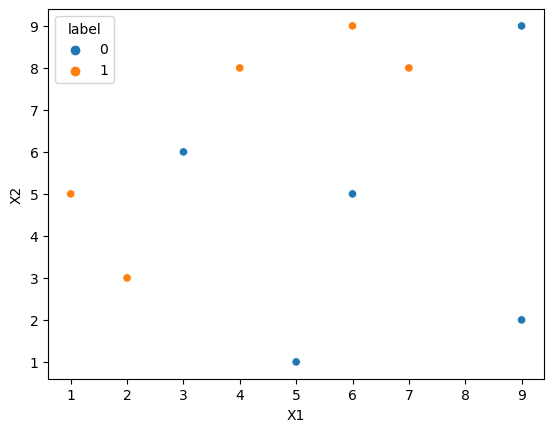

In [19]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [23]:
df['Weight'] = 1/df.shape[0]

In [24]:
df

,X1,X2,label,Weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [29]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [31]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [32]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

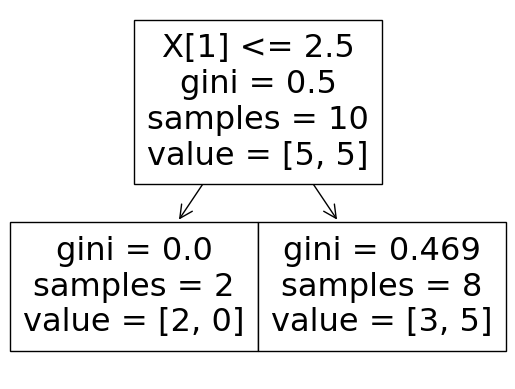

In [33]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

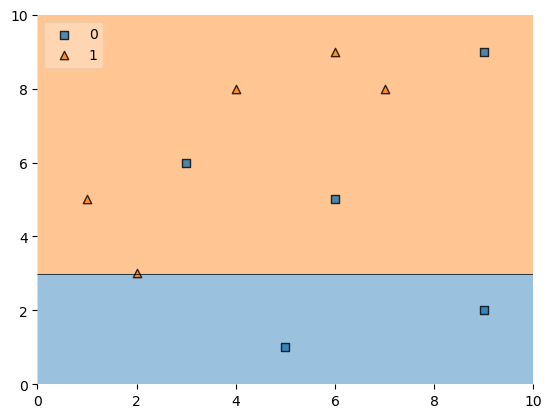

In [34]:
plot_decision_regions(X,y, clf=dt1,legend=2)

In [35]:
df['y_pred'] = dt1.predict(X)

In [36]:
df

,X1,X2,label,Weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [68]:
def cal_alpha(error):
    return 0.5*np.log((1-error)/(error))

In [40]:
alpha1 = cal_alpha(0.3)
alpha1

0.42364893019360184

In [42]:
def update_row_wt(row,alpha=0.4236):
    if row['label'] == row['y_pred']:
        return row['Weight']*np.exp(-alpha)
    else:
        return row['Weight']*np.exp(alpha)

In [43]:
df['Updated_wt'] = df.apply(update_row_wt, axis=1)

In [44]:
df

,X1,X2,label,Weight,y_pred,Updated_wt
0,1,5,1,0.1,1,0.065469
1,2,3,1,0.1,1,0.065469
2,3,6,0,0.1,1,0.152745
3,4,8,1,0.1,1,0.065469
4,5,1,0,0.1,0,0.065469
5,6,9,1,0.1,1,0.065469
6,6,5,0,0.1,1,0.152745
7,7,8,1,0.1,1,0.065469
8,9,9,0,0.1,1,0.152745
9,9,2,0,0.1,0,0.065469


In [45]:
df['Updated_wt'].sum()

0.9165151400883117

In [46]:
df['Normalized_wt'] = df['Updated_wt']/df['Updated_wt'].sum()

In [47]:
df

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt
0,1,5,1,0.1,1,0.065469,0.071432
1,2,3,1,0.1,1,0.065469,0.071432
2,3,6,0,0.1,1,0.152745,0.166659
3,4,8,1,0.1,1,0.065469,0.071432
4,5,1,0,0.1,0,0.065469,0.071432
5,6,9,1,0.1,1,0.065469,0.071432
6,6,5,0,0.1,1,0.152745,0.166659
7,7,8,1,0.1,1,0.065469,0.071432
8,9,9,0,0.1,1,0.152745,0.166659
9,9,2,0,0.1,0,0.065469,0.071432


In [48]:
df['Normalized_wt'].sum()

1.0

In [50]:
df['cumsum_upper'] = np.cumsum(df['Normalized_wt'])
df

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt,cumsum_upper
0,1,5,1,0.1,1,0.065469,0.071432,0.071432
1,2,3,1,0.1,1,0.065469,0.071432,0.142864
2,3,6,0,0.1,1,0.152745,0.166659,0.309523
3,4,8,1,0.1,1,0.065469,0.071432,0.380955
4,5,1,0,0.1,0,0.065469,0.071432,0.452387
5,6,9,1,0.1,1,0.065469,0.071432,0.523819
6,6,5,0,0.1,1,0.152745,0.166659,0.690477
7,7,8,1,0.1,1,0.065469,0.071432,0.761909
8,9,9,0,0.1,1,0.152745,0.166659,0.928568
9,9,2,0,0.1,0,0.065469,0.071432,1.000000


In [51]:
df['cumsum_lower'] = df['cumsum_upper'] - df['Normalized_wt']

In [53]:
df.columns

Index(['X1', 'X2', 'label', 'Weight', 'y_pred', 'Updated_wt', 'Normalized_wt',
       'cumsum_upper', 'cumsum_lower'],
      dtype='object')

In [54]:
df[['X1', 'X2', 'label', 'Weight', 'y_pred', 'Updated_wt', 'Normalized_wt', 'cumsum_lower','cumsum_upper']]

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065469,0.071432,0.000000,0.071432
1,2,3,1,0.1,1,0.065469,0.071432,0.071432,0.142864
2,3,6,0,0.1,1,0.152745,0.166659,0.142864,0.309523
3,4,8,1,0.1,1,0.065469,0.071432,0.309523,0.380955
4,5,1,0,0.1,0,0.065469,0.071432,0.380955,0.452387
5,6,9,1,0.1,1,0.065469,0.071432,0.452387,0.523819
6,6,5,0,0.1,1,0.152745,0.166659,0.523819,0.690477
7,7,8,1,0.1,1,0.065469,0.071432,0.690477,0.761909
8,9,9,0,0.1,1,0.152745,0.166659,0.761909,0.928568
9,9,2,0,0.1,0,0.065469,0.071432,0.928568,1.000000


In [55]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [57]:
index_values = create_new_dataset(df)
index_values

[4, 5, 4, 1, 1, 4, 2, 2, 8, 9]

In [58]:
sec_df = df.iloc[index_values,[0,1,2,3]]

In [59]:
sec_df

,X1,X2,label,Weight
4,5,1,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [60]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [61]:
X = sec_df.iloc[:,0:2].values
y = sec_df.iloc[:,2].values

In [62]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

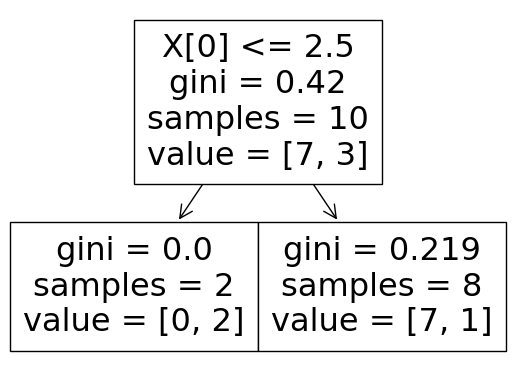

In [63]:
plot_tree(dt2)

<AxesSubplot:>

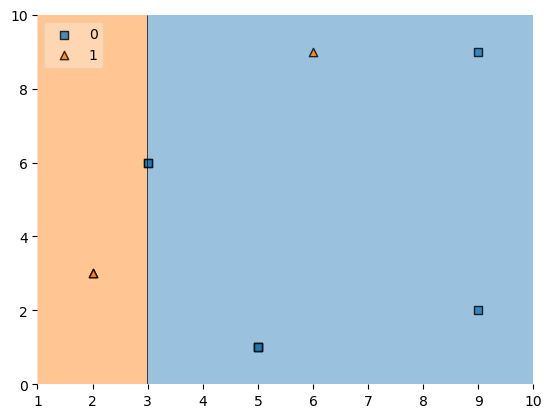

In [64]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [65]:
sec_df['y_pred'] = dt2.predict(X)

In [66]:
sec_df

,X1,X2,label,Weight,y_pred
4,5,1,0,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [71]:
alpha2 = cal_alpha(0.1)
alpha2

1.0986122886681098

In [74]:
def update_row_wt(row,alpha=1.09861):
    if row['label'] == row['y_pred']:
        return row['Weight']*np.exp(-alpha)
    else:
        return row['Weight']*np.exp(alpha)

In [75]:
sec_df['Updated_wt'] = df.apply(update_row_wt, axis=1)

In [76]:
sec_df

,X1,X2,label,Weight,y_pred,Updated_wt
4,5,1,0,0.1,0,0.033333
5,6,9,1,0.1,0,0.033333
4,5,1,0,0.1,0,0.033333
1,2,3,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
4,5,1,0,0.1,0,0.033333
2,3,6,0,0.1,0,0.299999
2,3,6,0,0.1,0,0.299999
8,9,9,0,0.1,0,0.299999
9,9,2,0,0.1,0,0.033333


In [77]:
sec_df['Normalized_wt'] = sec_df['Updated_wt']/sec_df['Updated_wt'].sum()

In [78]:
sec_df

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt
4,5,1,0,0.1,0,0.033333,0.029412
5,6,9,1,0.1,0,0.033333,0.029412
4,5,1,0,0.1,0,0.033333,0.029412
1,2,3,1,0.1,1,0.033333,0.029412
1,2,3,1,0.1,1,0.033333,0.029412
4,5,1,0,0.1,0,0.033333,0.029412
2,3,6,0,0.1,0,0.299999,0.264706
2,3,6,0,0.1,0,0.299999,0.264706
8,9,9,0,0.1,0,0.299999,0.264706
9,9,2,0,0.1,0,0.033333,0.029412


In [79]:
sec_df['Normalized_wt'].sum()

1.0000000000000002

In [80]:
sec_df['cumsum_upper'] = np.cumsum(sec_df['Normalized_wt'])
sec_df

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt,cumsum_upper
4,5,1,0,0.1,0,0.033333,0.029412,0.029412
5,6,9,1,0.1,0,0.033333,0.029412,0.058824
4,5,1,0,0.1,0,0.033333,0.029412,0.088236
1,2,3,1,0.1,1,0.033333,0.029412,0.117647
1,2,3,1,0.1,1,0.033333,0.029412,0.147059
4,5,1,0,0.1,0,0.033333,0.029412,0.176471
2,3,6,0,0.1,0,0.299999,0.264706,0.441177
2,3,6,0,0.1,0,0.299999,0.264706,0.705882
8,9,9,0,0.1,0,0.299999,0.264706,0.970588
9,9,2,0,0.1,0,0.033333,0.029412,1.000000


In [81]:
sec_df['cumsum_lower'] = sec_df['cumsum_upper'] - sec_df['Normalized_wt']

In [83]:
sec_df

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt,cumsum_upper,cumsum_lower
4,5,1,0,0.1,0,0.033333,0.029412,0.029412,0.000000
5,6,9,1,0.1,0,0.033333,0.029412,0.058824,0.029412
4,5,1,0,0.1,0,0.033333,0.029412,0.088236,0.058824
1,2,3,1,0.1,1,0.033333,0.029412,0.117647,0.088236
1,2,3,1,0.1,1,0.033333,0.029412,0.147059,0.117647
4,5,1,0,0.1,0,0.033333,0.029412,0.176471,0.147059
2,3,6,0,0.1,0,0.299999,0.264706,0.441177,0.176471
2,3,6,0,0.1,0,0.299999,0.264706,0.705882,0.441177
8,9,9,0,0.1,0,0.299999,0.264706,0.970588,0.705882
9,9,2,0,0.1,0,0.033333,0.029412,1.000000,0.970588


In [84]:
sec_df[['X1', 'X2', 'label', 'Weight', 'y_pred', 'Updated_wt', 'Normalized_wt', 'cumsum_lower','cumsum_upper']]

,X1,X2,label,Weight,y_pred,Updated_wt,Normalized_wt,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.033333,0.029412,0.000000,0.029412
5,6,9,1,0.1,0,0.033333,0.029412,0.029412,0.058824
4,5,1,0,0.1,0,0.033333,0.029412,0.058824,0.088236
1,2,3,1,0.1,1,0.033333,0.029412,0.088236,0.117647
1,2,3,1,0.1,1,0.033333,0.029412,0.117647,0.147059
4,5,1,0,0.1,0,0.033333,0.029412,0.147059,0.176471
2,3,6,0,0.1,0,0.299999,0.264706,0.176471,0.441177
2,3,6,0,0.1,0,0.299999,0.264706,0.441177,0.705882
8,9,9,0,0.1,0,0.299999,0.264706,0.705882,0.970588
9,9,2,0,0.1,0,0.033333,0.029412,0.970588,1.000000


In [85]:
index_values = create_new_dataset(sec_df)

In [86]:
third_df = sec_df.iloc[index_values,[0,1,2,3]]

In [87]:
third_df

,X1,X2,label,Weight
4,5,1,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1


In [88]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [89]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [90]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

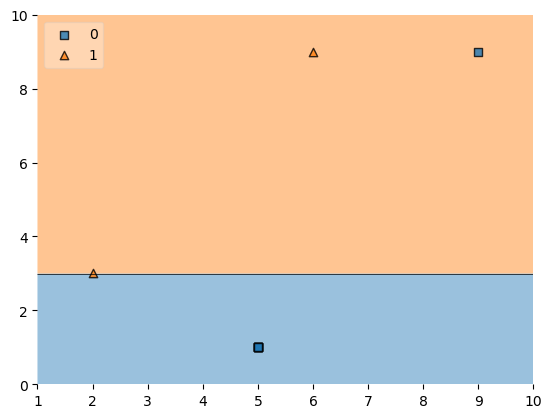

In [91]:
plot_decision_regions(X,y,clf=dt3,legend=2)